# Work example 3: Steel structure vibration due to harmonic excitation

![title](img/image_1.png)

In [1]:
# Dependencies
import numpy as np                  # Tools for math and working with array
import matplotlib.pyplot as plt     # Tools for plotting

# Constants
m = 10000           # Mass [kg]
xi = 0.02           # Damping ratio
P_static = 1500     # Static force applied [N]
delta_static = 7    # Initial displacement [mm]

P_0 = 600               # Force magnitude [N]
f = 0.9                 # Force frequency [Hz]
omega = 2 * np.pi * f   # Angular force freqency [rad/s]

## Dynamic parameters

### 1. Stiffness, $k$

\begin{equation}
k = \frac{P}{\delta}
\end{equation}

In [2]:
# Stiffness
k = P_static / (delta_static / 1000)
print(f"Stiffness: {k: 0.3f} N/m")

Stiffness:  214285.714 N/m


### 2. Natural frequency, $\omega_n$ and $f_n$

\begin{equation}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation}

\begin{equation}
f_n = \frac{\omega_n}{2\pi}
\end{equation}

In [3]:
# Natural frequency
omega_n = np.sqrt(k / m)
f_n = omega_n / (2 * np.pi)

print(f"Natural frequency: {omega_n: 0.3f} rad/s")
print(f"Frequency: {f_n: 0.3f} Hz")

Natural frequency:  4.629 rad/s
Frequency:  0.737 Hz


### 3. The oscillation period, $T$

\begin{equation}
T = \frac{1}{f_n}
\end{equation}

In [4]:
# The oscillation period
T = 1 / f_n
print(f"The oscillation period: {T: 0.3f} s")

The oscillation period:  1.357 s


## Steady state response

### 1. Dynamic magnification factor (DMF) and phase shift $\phi$

\begin{equation}
\beta = \frac{\omega}{\omega_n}
\end{equation}

\begin{equation}
DMF = \frac{1}{\sqrt{(1-\beta^2)^2 + (2 \xi \beta)^2 }}
\end{equation}

\begin{equation}
\phi = \tan^{-1} \left( \frac{2\xi \beta }{1-\beta^2}\right)
\end{equation}

In [5]:
beta = omega / omega_n
DMF = 1 / np.sqrt((1 - beta**2)**2 + (2 * xi * beta)**2)
phi = np.arctan((2 * xi * beta) / (1 - beta**2))

print(f"The frequency ratio: {beta: 0.3f}")
print(f"Dynamic magnification factor: {DMF: 0.3f}")
print(f"The phase shift: {phi: 0.3f} radians or {phi * 180 / np.pi: 0.1f} grades.")

The frequency ratio:  1.222
Dynamic magnification factor:  2.021
The phase shift: -0.099 radians or -5.7 grades.


### 2. Structural response for  $0\leq t\leq 60$

The following equation describes the response of the system to harmonic loading,

\begin{equation}
u(t) = \underbrace{e^{-\xi\omega_nt}[A\sin(\omega_dt) + B\cos(\omega_dt)]}_{\text{Transient}} + \underbrace{\frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right][(1-\beta^2)\sin(\omega t) - 2\xi\beta\cos(\omega t)]}_{\text{Steady-state}} 
\end{equation}

In order to use this equation we must first determine the constants $A$ and $B$ within the transient component. We do this by applying the initial conditions, in this case at $t=0$, the mass is at rest and therefore the position, $u(t=0)$ and velocity, $\dot{u}(t=0)$ are zero.

To apply the second boundary condition on velocity we must first differentiate our expression for $u(t)$. First we will make some substitutions to make the equation easier to analyse, let,

\begin{equation}
\Omega = \frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right]
\end{equation}

\begin{equation}
C_1 = \Omega\:(1-\beta^2)
\end{equation}

\begin{equation}
C_2 = -\Omega\:2\:\xi\:\beta
\end{equation}

This allows us to rewrite the equation for $u(t)$ as,

\begin{equation}
u(t) = A\underbrace{\left[e^{-\xi\omega_nt}\:\sin(\omega_d t) \right]}_{f_1(t)} + B\underbrace{\left[e^{-\xi\omega_nt}\:\cos(\omega_d t) \right]}_{f_2(t)} + C_1\:\underbrace{\sin(\omega t)}_{f_3(t)} + C_2\:\underbrace{\cos(\omega t)}_{f_4(t)}
\end{equation}

Now each of the four functions of $t$ can be differentiated in turn. Both $f_1(t)$ and $f_2(t)$ can be processed using the product rule while $f_3(t)$ and $f_4(t)$ can be processed using the chain rule. Evaluating each in turn,

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_1(t) = e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt}
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_2(t) = -e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt}
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_3(t) = \omega\cos(\omega t)
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_4(t) = -\omega\sin(\omega t)
\end{equation}

Combining these four expressions we obtain our expression for the velovity, $\dot{u}(t)$,

\begin{equation}
\begin{split}
\dot{u}(t) =  & \:A\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt} \right] + \\  & \:B\left[ -e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt}\right] + \\ &\: C_1\:\omega\cos(\omega t) - C_2\: \:\omega\sin(\omega t)
\end{split}
\end{equation}

Expressions for $u(t)$ and $\dot{u}(t)$ can now be evaluated at $t=0$. Helpfully many of the terms disappear due to the fact $t=0$. Evaluating the two equations for the two unknowns, $A$ and $B$ yields,

\begin{equation}
A = -\frac{1}{\omega_d}(C_1\:\omega + C_2\:\xi\:\omega_n)
\end{equation}

\begin{equation}
B=-C_2
\end{equation}

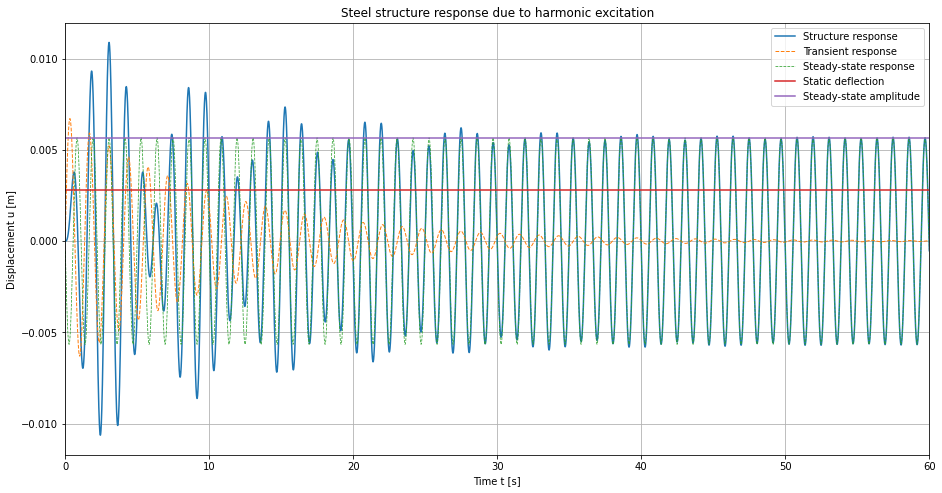

In [8]:
# Computing constant
O = (P_0 / k) * (1 / ((1 - beta**2)**2 + (2 * xi * beta)**2))   #Capital Omega
C1 = O * (1 - beta**2)
C2 = -O * 2 * xi * beta
omega_d = omega_n * np.sqrt(1 - xi**2)                          # Damped natural frequency
A = (-1 / omega_d) * (C1 * omega + C2 * xi * omega_n)
B = -C2

# Vector of time
t_max = 60                          # Maximum time [s]
delta_t = 0.001                     # Time step
nPoints = int(t_max / delta_t)      # Number of points -> int
t = np.linspace(0, t_max, nPoints)

# Evaluating transient respond, ut
ut = np.exp(-xi * omega_n * t) * (A * np.sin(omega_d * t) + B * np.cos(omega_d * t))

# Evaluating steady steat respond, up
up = O * ((1 - beta**2) * np.sin(omega * t) - (2 * xi * beta) * np.cos(omega * t))

# Displacement vetor, u
u = ut + up

# Plotting displacement
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t, u, label="Structure response")
axes.plot(t, ut, "--", lw=1, label="Transient response")
axes.plot(t, up, "--", lw=0.75, label="Steady-state response")
axes.plot([0, t_max], [P_0/k, P_0/k], label="Static deflection")
axes.plot([0, t_max], [DMF * P_0/k, DMF * P_0/k], label="Steady-state amplitude")
axes.legend()
axes.set_title("Steel structure response due to harmonic excitation")
axes.set_xlim([0, t_max])
axes.set_xlabel("Time t [s]")
axes.set_ylabel("Displacement u [m]")
axes.grid()
fig.show()

### 3. Free vibration response $11\leq t\leq 30$

Harmonic force is removed at $t$ = 11 s. We want to know the system position at $t$ = 30 s.
It's required to evaluted the free vibration when the initial condition are not zero.

### Position and velocity at $t$ = 11 s

In [26]:
time = 11

# Calculating position
ut_time = np.exp(-xi * omega_n * time) * (A * np.sin(omega_d * time) + B * np.cos(omega_d * time))
up_time = O * ((1 - beta**2) * np.sin(omega * time) - (2 * xi * beta) * np.cos(omega * time))
u_time = ut_time + up_time
print(f"The system position at t = 11s is: {u_time: 0.4f} m.")

# Calculating velocity
term_1 = np.exp(-xi * omega_n * time) * omega_d * np.cos(omega_d * time) - xi * omega_n * np.exp(-xi * omega_n * time) * np.sin(omega_d * time)

term_2 = -np.exp(-xi * omega_n * time) * omega_d * np.sin(omega_d * time) - xi * omega_n * np.exp(-xi * omega_n * time) * np.cos(omega_d * time)

v_time = (A * term_1) + (B * term_2) + (C1 * omega * np.cos(omega * time)) - (C2 * omega * np.sin(omega * time))
print(f"The system velocity at t = 11s is: {v_time: 0.4f} m/s.")


The system position at t = 11s is:  0.0045 m.
The system velocity at t = 11s is: -0.0191 m/s.


These values of $u(t)$ and $\dot{u}(t)$ now serve as the initial conditions when determining the free vibration response at $t=30$ s. We are now only concerned with the transient response,

\begin{equation}
u(t) = e^{-\xi\omega_nt}[A\sin(\omega_dt) + B\cos(\omega_dt)]
\end{equation}

We must now determine the constants $A$ and $B$ with our new initial conditions. From above, we can restate our expressions for $u(t)$ and $\dot{u}(t)$,

\begin{equation}
u(t) = A\left[e^{-\xi\omega_nt}\:\sin(\omega_d t) \right] + B\left[e^{-\xi\omega_nt}\:\cos(\omega_d t) \right] 
\end{equation}

\begin{equation}
\dot{u}(t) = A\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt}\right] + B\left[-e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt} \right]
\end{equation}

Evaluating both expressions for the boundary conditions $u(t=11) =0.0045$ and $\dot{u}(t=11) = -0.0191$ results in two simultaneous equations,

In [29]:
# Numerically evaluating the terms in square brackets:
# u(t) = A*a + B*b
# v(t) = A*term_1 + B*term_2        Note: term_1 and term_2 were calculated before
a = np.exp(-xi * omega_n * time) * np.sin(omega_d * time)
b = np.exp(-xi * omega_n * time) * np.cos(omega_d * time)

Therefore the system of equations, in martix form is,

\begin{equation}
\begin{bmatrix}
    0.2167 & 0.289 \\
    1.317 & -1.029
\end{bmatrix}\times
\begin{bmatrix}
    A \\
    B
\end{bmatrix} = 
\begin{bmatrix}
    0.0045 \\
    -0.0191
\end{bmatrix}
\end{equation}

Solving for A and B...

In [35]:
# Defining the system of equation
matrix = np.mat([[a, b], [term_1, term_2]])
vector = np.array([[u_time], [v_time]])
constants = matrix.I * vector               # constants = Inv(matrix) * vector
A_new = constants[0].item()
B_new = constants[1].item()
print(f"The new constants are A = {A_new: 0.3f} and B = {B_new: 0.3f}.")

The new constants are A = -0.001 and B =  0.017.


In [40]:
# Solving the free vibration equation for t = 30s
new_time = 30
a_time30 = np.exp(-xi * omega_n * new_time) * np.sin(omega_d * new_time)
b_time30 = np.exp(-xi * omega_n * new_time) * np.cos(omega_d * new_time)

u_time30 = A_new * a_time30 + B_new * b_time30
print(f"After release force at t = 11s, the new system position at t = 30s is: {u_time30: 0.4f} m.")

After release force at t = 11s, the new system position at t = 30s is:  0.0008 m.


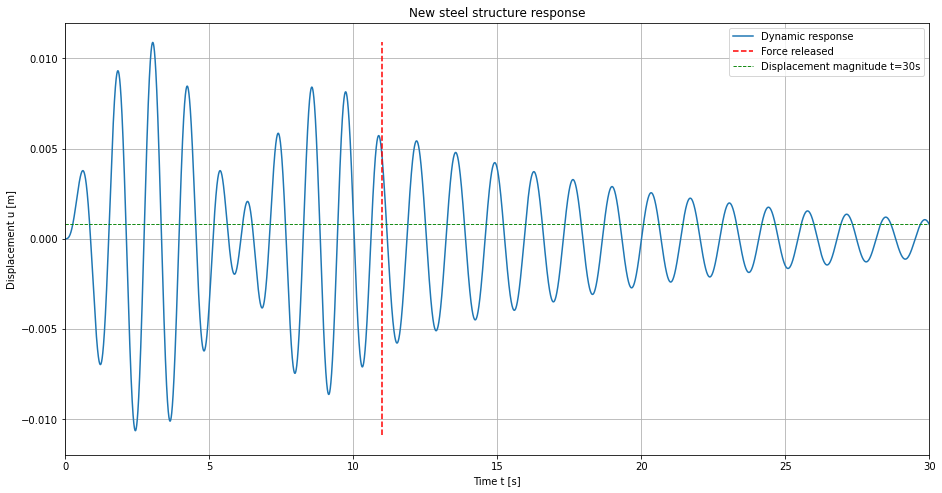

In [63]:
# Plotting the new system displacement
new_t_max = 30
new_Points = int(new_t_max / delta_t)
new_t = np.linspace(11, new_t_max, new_Points)

# Calculating the new displacement vector
a_time = np.exp(-xi * omega_n * new_t) * np.sin(omega_d * new_t)
b_time = np.exp(-xi * omega_n * new_t) * np.cos(omega_d * new_t)
u_time = A_new * a_time + B_new * b_time

# Creating the final vector
u_end = np.array([])
t_end = np.array([])

# Generating loop
n = 0
tt = 0
while tt <= 11:
    u_end = np.append(u_end, u[n])
    t_end = np.append(t_end, tt)
    n += 1
    tt += delta_t

u_end = np.append(u_end, u_time)
t_end = np.append(t_end, new_t)

# Plotting the result
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t_end, u_end, label="Dynamic response")
axes.plot([time, time], [-np.max(u_end), np.max(u_end)], "r--", label="Force released")
axes.plot([0, new_t_max], [u_time30, u_time30], "g--", lw=0.90, label="Displacement magnitude t=30s")
axes.set_title("New steel structure response")
axes.set_xlim([0, t_end[-1]])
axes.set_xlabel("Time t [s]")
axes.set_ylabel("Displacement u [m]")
axes.grid()
axes.legend()
fig.show()